In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('SalaryData_Train.csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data = data_raw.copy()
data['Salary'] = data['Salary'].map({' <=50K' : 0, ' >50K' : 1})
data_test = pd.read_csv('SalaryData_Test.csv')
data_test['Salary'] = data_test['Salary'].map({' <=50K' : 0, ' >50K' : 1})
data_jumbo = pd.concat([data, data_test])

In [5]:
data_with_dummies = pd.get_dummies(data_jumbo)
data_train = data_with_dummies.iloc[0:30161,:]
data_test = data_with_dummies.iloc[30161:,:]

In [6]:
y = data_train['Salary']
X = data_train.drop('Salary', axis = 1)
X_norm = normalize(X)

In [7]:
model = MB()
param_grid = {'alpha' : range(1,11)}
results = GridSearchCV(model, param_grid, cv = 10)
results.fit(X_norm, y)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': range(1, 11)})

In [8]:
results.best_params_, results.best_score_

({'alpha': 8}, 0.7744438346276493)

## Resampling the data

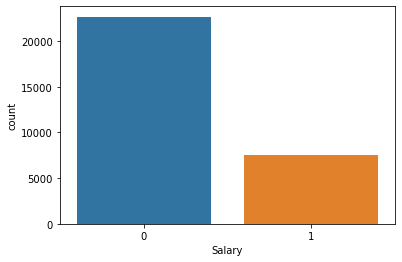

In [9]:
sns.countplot(y)

In [10]:
resample = SMOTE(random_state = 42)
X_res, y_res = resample.fit_resample(X_norm, y)
X_res.shape, y_res.shape

((45306, 102), (45306,))

In [11]:
model = MB(alpha = 8)
model.fit(X_res, y_res)

MultinomialNB(alpha=8)

In [12]:
X_test = data_test.drop('Salary', axis = 1)
y_test = data_test['Salary']
X_test_norm = normalize(X_test)

In [13]:
predictions = model.predict(X_test_norm)
np.mean(y_test == predictions)

0.7753652058432935

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     11360
           1       0.58      0.31      0.40      3700

    accuracy                           0.78     15060
   macro avg       0.69      0.62      0.63     15060
weighted avg       0.75      0.78      0.75     15060



In [15]:
confusion_matrix(y_test, predictions)

array([[10536,   824],
       [ 2559,  1141]], dtype=int64)

C:\Users\kp305\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


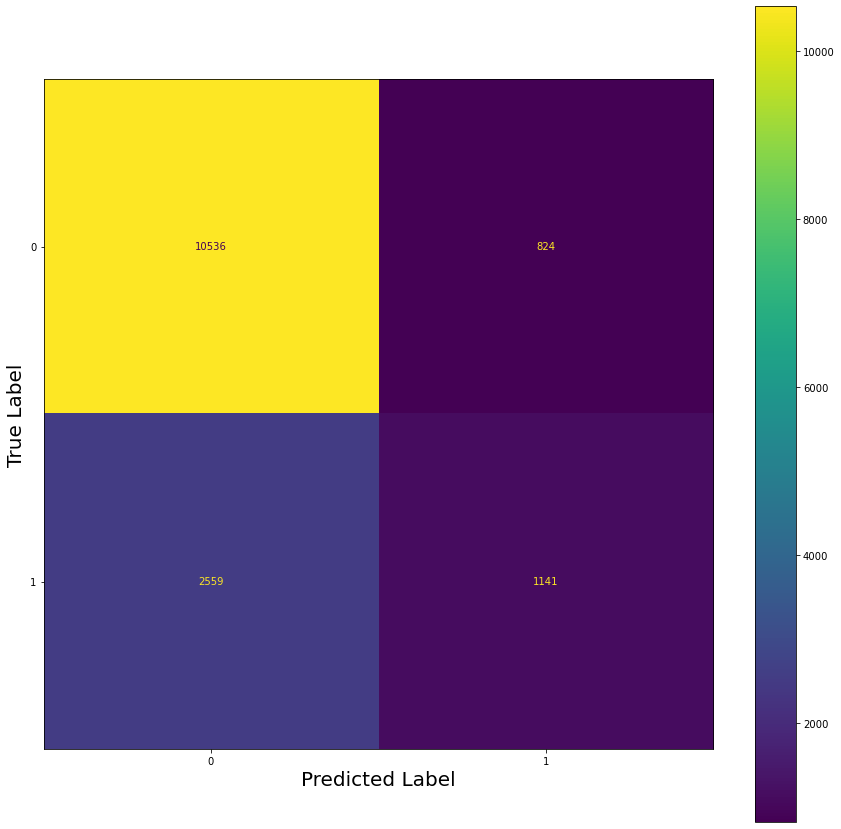

In [16]:
fig , ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(model, X_test_norm, y_test, ax = ax)
ax.set_xlabel('Predicted Label', fontsize = 20)
ax.set_ylabel('True Label', fontsize = 20)
plt.show()